In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, SGDRegressor, ElasticNet
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [99]:
train = pd.read_csv('./Data/소득예측경진대회/train.csv')
test = pd.read_csv('./Data/소득예측경진대회/test.csv')
submission = pd.read_csv('./Data/소득예측경진대회/sample_submission.csv')

train = train.drop(['id'], axis = 1)
test = test.drop(['id'], axis = 1)

train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


In [100]:
#train['target'] = train['target'].astype('object')

train['workclass'] = train['workclass'].fillna('Private')
train['occupation'] = train['occupation'].fillna('Exec-managerial')
train['native.country'] = train['native.country'].fillna('United-States')

In [101]:
X = train.drop(['target'], axis = 1)
y = train['target']

In [102]:
columns = ('workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country')

for cols in columns:
    le = LabelEncoder()
    le.fit(list(X[cols]))
    X[cols] = le.transform(list(X[cols]))
    
for cols in columns:
    le = LabelEncoder()
    le.fit(list(test[cols]))
    test[cols] = le.transform(list(test[cols]))

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 123)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(13984, 14) (3496, 14)
(13984,) (3496,)


input_shape = (14, )
binary_crossentropy
categorical_crossentropy

In [42]:
model = Sequential()

#model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu', input_shape = (14, )))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               7680      
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_50 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_51 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_52 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_53 (Dense)             (None, 2)                 66        
Total params: 182,306
Trainable params: 182,306
Non-trainable params: 0
________________________________________________

In [43]:
early_stopping = EarlyStopping(monitor = 'val_acc', patience = 5, restore_best_weights = True)
lr_sche = ReduceLROnPlateau(monitor = 'val_acc', factor = .5)

hist = model.fit(x_train.values, y_train.values, epochs = 100, validation_split = .2, callbacks = [early_stopping, lr_sche])

Epoch 1/100


ValueError: in user code:

    C:\Users\LEE\anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\LEE\anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\LEE\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\LEE\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\LEE\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\LEE\anaconda3\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\LEE\anaconda3\lib\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    C:\Users\LEE\anaconda3\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\LEE\anaconda3\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\LEE\anaconda3\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\LEE\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\LEE\anaconda3\lib\site-packages\keras\losses.py:1809 binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    C:\Users\LEE\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\LEE\anaconda3\lib\site-packages\keras\backend.py:5000 binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\LEE\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\LEE\anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:245 sigmoid_cross_entropy_with_logits_v2
        return sigmoid_cross_entropy_with_logits(
    C:\Users\LEE\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\LEE\anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:132 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 2) vs (None, 1))


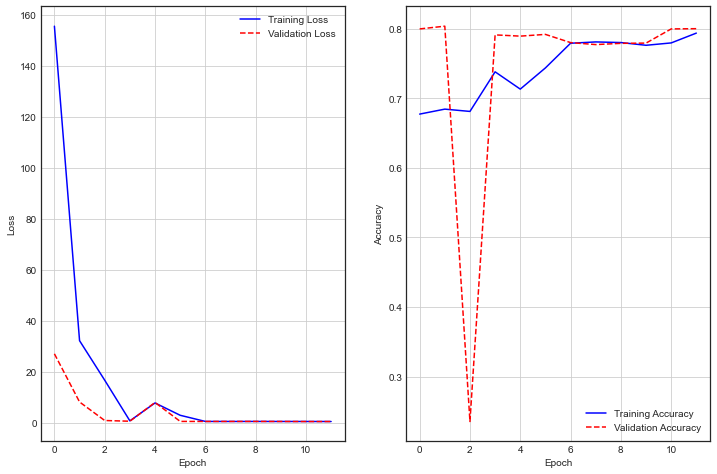

In [46]:
plt.figure(figsize = (12, 8))

plt.subplot(1, 2, 1)
plt.plot(range(12), hist.history['loss'], 'b-', label = 'Training Loss')
plt.plot(range(12), hist.history['val_loss'], 'r--', label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(12), hist.history['acc'], 'b-', label = 'Training Accuracy')
plt.plot(range(12), hist.history['val_acc'], 'r--', label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [41]:
pred = model.predict(test)
pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [56]:
sub = pd.DataFrame({'id':submission.id, 'target':np.ndarray(pred)})
sub.to_csv('dd.csv', index = False)

ValueError: maximum supported dimension for an ndarray is 32, found 15081

## scaling 적용 ver.

In [111]:
mm_scaler = MinMaxScaler()
X = mm_scaler.fit_transform(X)
test = mm_scaler.fit_transform(test)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 123)

#y_train_binary = to_categorical(y_train, 2)
#y_test_binary = to_categorical(y_test, 2)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

model = Sequential()

model.add(Dense(9, activation='relu', input_shape=(14,)))
model.add(Dense(27, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(54, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(27, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2))

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

model.summary()

(13984, 14) (3496, 14)
(13984,) (3496,)
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_140 (Dense)            (None, 27)                270       
_________________________________________________________________
dropout_51 (Dropout)         (None, 27)                0         
_________________________________________________________________
dense_141 (Dense)            (None, 54)                1512      
_________________________________________________________________
dropout_52 (Dropout)         (None, 54)                0         
_________________________________________________________________
dense_142 (Dense)            (None, 27)                1485      
_________________________________________________________________
dropout_53 (D

In [112]:
early_stopping = EarlyStopping(monitor = 'val_acc', patience = 5, restore_best_weights = True)
lr_sche = ReduceLROnPlateau(monitor = 'val_acc', factor = .5)

hist = model.fit(x_train, y_train, epochs = 100, validation_split = .2, callbacks = [early_stopping, lr_sche])

Epoch 1/100
350/350 [==============================] - 3s 8ms/step - loss: 0.5233 - acc: 0.4811 - val_loss: 0.4249 - val_acc: 0.4451
Epoch 2/100
350/350 [==============================] - 3s 7ms/step - loss: 0.4471 - acc: 0.3806 - val_loss: 0.4453 - val_acc: 0.2456
Epoch 3/100
350/350 [==============================] - 3s 7ms/step - loss: 0.4270 - acc: 0.4150 - val_loss: 0.3894 - val_acc: 0.4133
Epoch 4/100
350/350 [==============================] - 3s 8ms/step - loss: 0.4180 - acc: 0.4921 - val_loss: 0.3922 - val_acc: 0.7569
Epoch 5/100
350/350 [==============================] - 3s 7ms/step - loss: 0.4093 - acc: 0.6306 - val_loss: 0.3926 - val_acc: 0.7308
Epoch 6/100
350/350 [==============================] - 2s 7ms/step - loss: 0.4026 - acc: 0.5752 - val_loss: 0.3704 - val_acc: 0.4061
Epoch 7/100
350/350 [==============================] - 3s 7ms/step - loss: 0.4308 - acc: 0.6348 - val_loss: 0.3977 - val_acc: 0.8273
Epoch 8/100
350/350 [==============================] - 3s 7ms/step - 

In [113]:
loss = model.evaluate(x_test, y_test, verbose = 1, batch_size = 30)
print(loss)

117/117 [==============================] - 0s 4ms/step - loss: 0.4101 - acc: 0.8218
[0.410079687833786, 0.8217963576316833]


In [114]:
pred = model.predict(test)
classes_pred = np.argmax(pred, axis = 1)
classes_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
dense_submission = pd.DataFrame({'id':submission.id, 'target':classes_pred})
dense_submission.to_csv("dense_submission.csv", index = False)

In [116]:
dense_submission['target'].value_counts()

0    13145
1     1936
Name: target, dtype: int64